<a href="https://colab.research.google.com/github/youngchanseo/Hon.Gong.Machine-SNU/blob/main/(06_3_1)_PCA_%ED%81%B4%EB%9E%98%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 과일 사진 데이터를 다운로드 하여 넘파이 배열로 적재
#!wget https://bit.ly/fruits_300_data -O fruits_300.npy
!wget https://raw.githubusercontent.com/youngchanseo/Hon.Gong.Machine-SNU/main/(06_0_0)_fruits_300_image
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `wget https://raw.githubusercontent.com/youngchanseo/Hon.Gong.Machine-SNU/main/(06_0_0)_fruits_300_image'


In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca. fit(fruits_2d)

PCA(n_components=50)

n_components=50으로 지정했기 때문에, pca. components_배열의 첫번째 차원이 50임
즉 50개의 주성분을 찾은것임

두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000

원본 데이터와 차원이 같으므로, 주성분을 100*100 크기의 이미지 처럼 출력 해볼 수 있음.

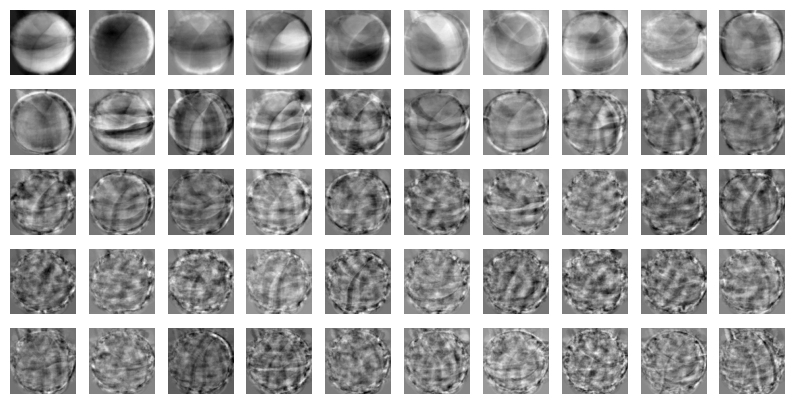

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    #figsize는  ratio 매개변수에 비례하여 커짐. 기본값 1

  # 2중 for 반복문을 사용하여 먼저 첫 번째 행을 따라 이미지를 그림.
  # 그리고 두번째 행의 이미지를 그리는 식으로 계속됨

    n = len(arr)    # n은 샘플 개수입니다
  # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10개로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸것.
한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것 처럼 생각할 수도 있음

주성분을 찾았으므로, 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음.

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits.shape)

(300, 100, 100)


fruits_2d는 (300,1000)크기의 배열임. 10,000개의 픽셀 (특성)을 가진 3000개의 이미지입니다. 50개의 주성분을 찾은 PCA모델을 찾은 PCA 모델을 사용해 이를 (300,50) 크기의 배열로 변환함
fruits_pca 배열은 50개의 특성을 가진 데이터임

#원본 데이터 재구성
최대한 분산이 큰 방향으로 데이터를 투영했기에, 원본 데이터를 상당 부분 재구성 할 수  있음
PCA 클래스는 inverse_transform() method 를 제공함

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)


(300, 10000)


예상대로 10,000개의 특성이 복원됨.

이 데이터를 100 * 100 크기로 바꾸어 100개씩 나누어 출력해보도록 하겠음


|n
|n
|n


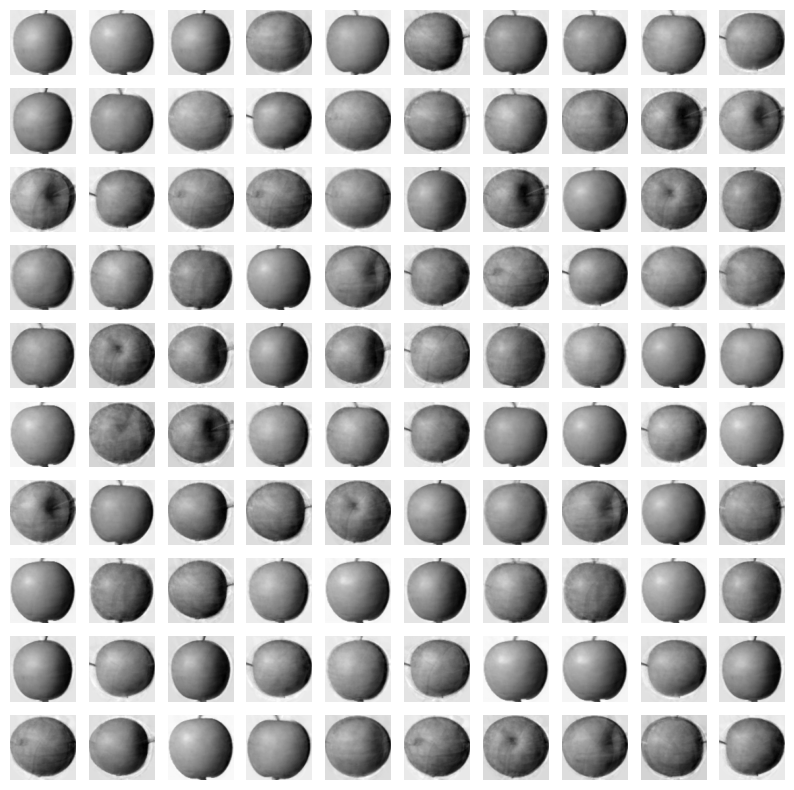

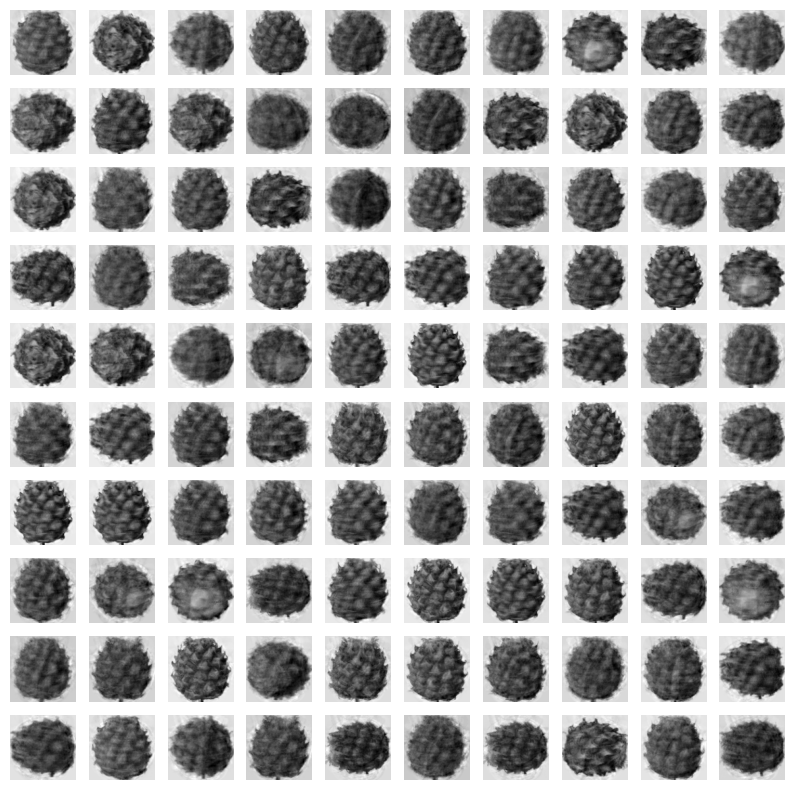

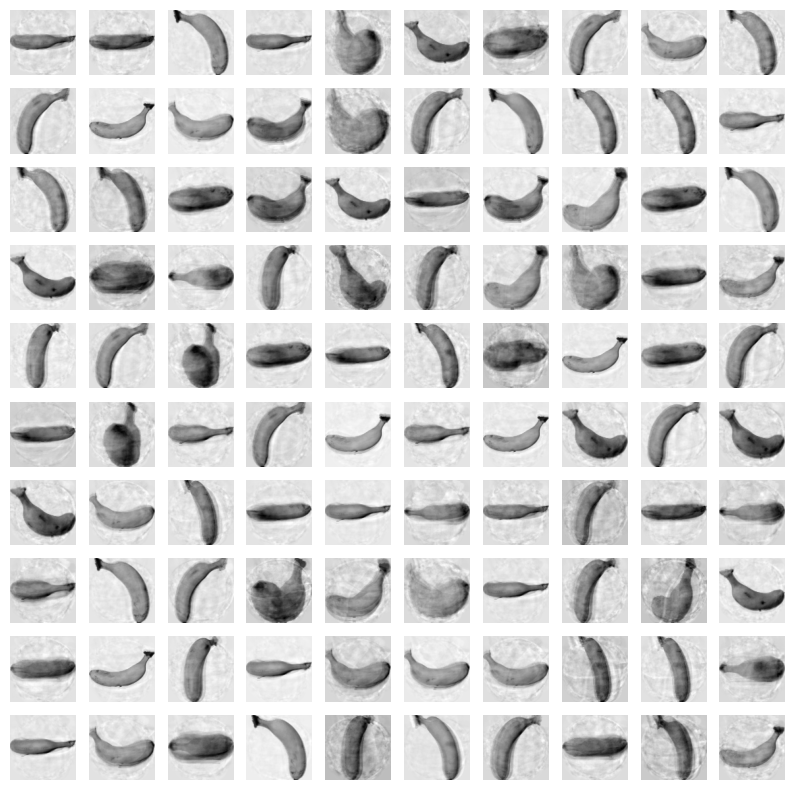

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("|n")

설명된 분산

In [ ]:
print(np.sum)